# Primera entrega ML

# Predicción de la Valoración de Startups Unicornio Utilizando Machine Learning


### Este proyecto busca desarrollar un modelo de machine learning para predecir la valoración de las startups unicornio, esas empresas privadas valoradas en más de mil millones de dólares. El modelo se basará en diversos factores como la ubicación de la empresa, la industria, los inversores, y otros datos relevantes.


En los últimos años, el término "startup unicornio" se ha vuelto cada vez más común en el mundo de los negocios. Estas empresas, que han alcanzado una valoración de mil millones de dólares mientras aún son privadas, están redefiniendo industrias y cambiando la forma en que operan los mercados.

Sin embargo, predecir qué startups alcanzarán este estatus es un desafío complejo. Existen muchos factores que pueden influir en el éxito de una startup, desde la industria en la que operan hasta su ubicación geográfica y los inversores que las respaldan. A través del aprendizaje automático, esperamos identificar patrones y relaciones en estos factores que puedan indicarnos qué startups tienen más probabilidades de convertirse en unicornios.

Para este proyecto, hemos recopilado un conjunto de datos que incluye información sobre diversas startups unicornio, incluyendo su valoración, la fecha en que alcanzaron el estatus de unicornio, su país y ciudad de origen, la industria en la que operan, y los inversores que las respaldan. Utilizaremos este conjunto de datos para entrenar un modelo de machine learning que pueda predecir la valoración de una startup basándose en estas características.

Al finalizar este proyecto, esperamos haber desarrollado un modelo de machine learning sólido y efectivo que pueda usarse para predecir la valoración de las startups unicornio. Este modelo no solo podría ser una herramienta útil para los inversores y emprendedores, sino que también podría proporcionar una visión fascinante de las características que definen a estas empresas de rápido crecimiento.


### Datasets y fuentes alternativas de datos
Incluye aquí una breve descripción del dataset o datasets para tu proyecto. Incluye también las fuentes de cada uno de ellos.

In [4]:
tipo_ml = "Regresión" 

target_descr = "La variable objetivo en este proyecto es la 'valoración' de la startup. Esta es una variable continua que representa la valoración en miles de millones de dólares de una startup en el momento en que se convierte en un unicornio."

metricas = ['MAE', 'MSE', 'RMSE', 'R2'] 


Dataset utilizado: [Conjunto de datos de Startups Unicornio a nivel mundial en Kaggle](https://www.kaggle.com/datasets/uzairrehman/world-wide-unicorn-startups)


In [5]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import os 

In [6]:
unicornios = pd.read_csv('C:/Users/horta/Desktop/EDA/World_Wide_Unicorn_Startups.csv')

In [7]:
unicornios.head(20)

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1
5,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2014,30,12
6,Databricks,38.0,2/5/2019,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,2
7,Revolut,33.0,4/26/2018,United Kingdom,London,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,4
8,Nubank,30.0,3/1/2018,Brazil,Sao Paulo,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,1,3
9,Epic Games,28.7,10/26/2018,United States,Cary,Other,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,10


In [8]:
unicornios.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Company    936 non-null    object 
 1   Valuation  936 non-null    float64
 2   Date       936 non-null    object 
 3   Country    936 non-null    object 
 4   City       921 non-null    object 
 5   Industry   936 non-null    object 
 6   Investors  936 non-null    object 
 7   year       936 non-null    int64  
 8   month      936 non-null    int64  
 9   day        936 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 73.2+ KB


In [9]:
unicornios = unicornios.drop(columns=['Company', 'Date'])


# Analisis univariante

In [10]:
unicornios.describe()


,Valuation,year,month,day
count,936.000000,936.000000,936.000000,936.000000
mean,3.281154,2019.543803,15.694444,6.740385
std,7.473179,2.020273,8.642799,3.248350
min,1.000000,2007.000000,1.000000,1.000000
25%,1.050000,2018.000000,8.000000,4.000000
50%,1.600000,2021.000000,16.000000,7.000000
75%,3.000000,2021.000000,23.000000,10.000000
max,140.000000,2021.000000,31.000000,12.000000


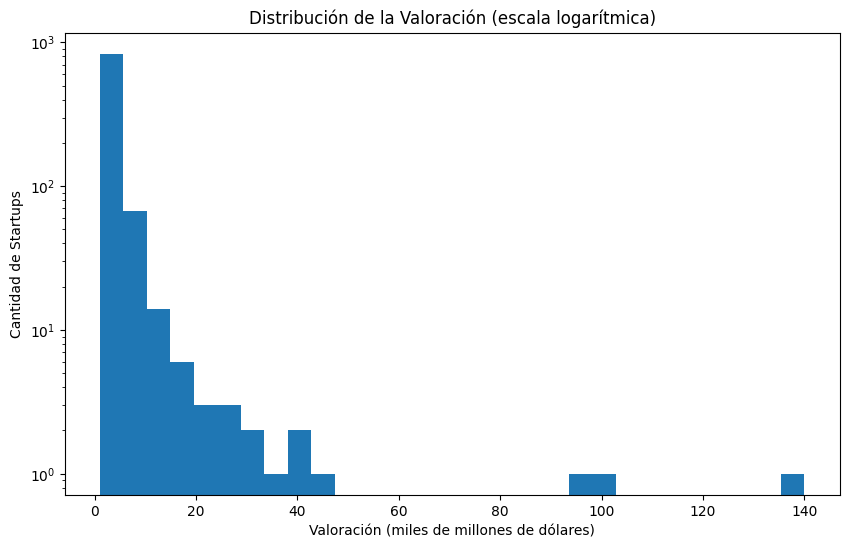

In [11]:
plt.figure(figsize=(10,6))
plt.hist(unicornios['Valuation'], bins=30, log=True)
plt.title('Distribución de la Valoración (escala logarítmica)')
plt.xlabel('Valoración (miles de millones de dólares)')
plt.ylabel('Cantidad de Startups')
plt.show()



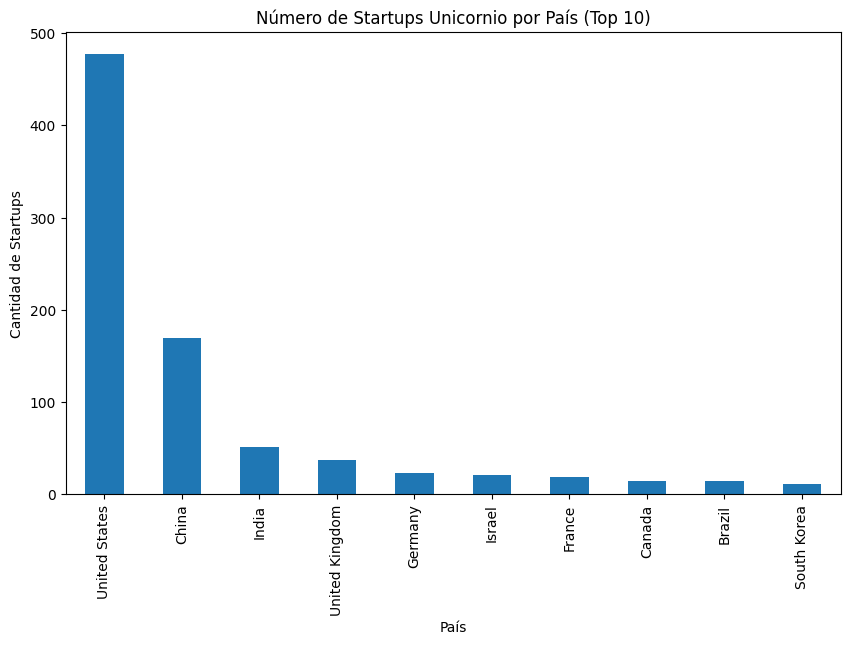

In [12]:
plt.figure(figsize=(10,6))
unicornios['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Número de Startups Unicornio por País (Top 10)')
plt.xlabel('País')
plt.ylabel('Cantidad de Startups')
plt.show()


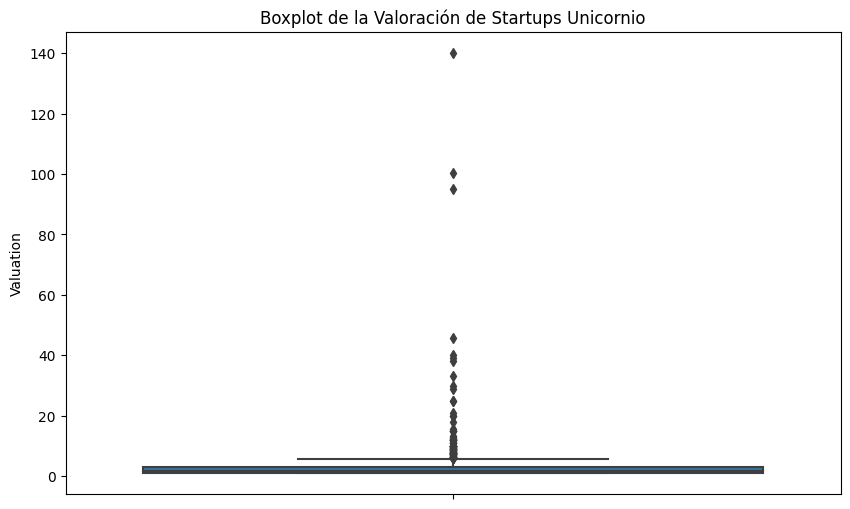

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(y=unicornios['Valuation'])
plt.title('Boxplot de la Valoración de Startups Unicornio')
plt.show()


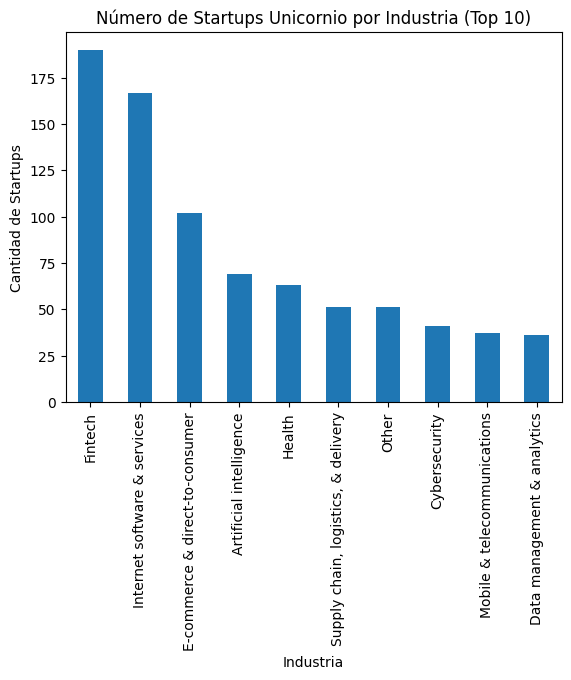

In [14]:
unicornios['Industry'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Número de Startups Unicornio por Industria (Top 10)')
plt.xlabel('Industria')
plt.ylabel('Cantidad de Startups')
plt.show()


In [15]:
unicornios.isna().sum()


Valuation     0
Country       0
City         15
Industry      0
Investors     0
year          0
month         0
day           0
dtype: int64

In [16]:
moda_city = unicornios['City'].mode()[0]
unicornios['City'].fillna(moda_city, inplace=True)


In [17]:
unicornios['City'].isna().sum()


0

In [18]:
unicornios['Industry'] = unicornios['Industry'].replace('Finttech', 'Fintech')


In [19]:
unicornios['Industry'] = unicornios['Industry'].replace('Artificial Intelligence', 'Artificial intelligence')

startups_por_industria = unicornios['Industry'].value_counts()
print("\nNúmero de startups por industria:\n", startups_por_industria)



Número de startups por industria:
 Industry
Fintech                                191
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 73
Health                                  63
Other                                   51
Supply chain, logistics, & delivery     51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Name: count, dtype: int64


In [20]:
industrias_unicas = unicornios['Industry'].unique()
print("Número de industrias únicas:", len(industrias_unicas))
startups_por_industria = unicornios['Industry'].value_counts()
print("\nNúmero de startups por industria:\n", startups_por_industria)


Número de industrias únicas: 15

Número de startups por industria:
 Industry
Fintech                                191
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 73
Health                                  63
Other                                   51
Supply chain, logistics, & delivery     51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Name: count, dtype: int64


In [21]:
paises_unicos = unicornios['Country'].unique()
print("Número de países únicos:", len(paises_unicos))

startups_por_pais = unicornios['Country'].value_counts()
print("\nNúmero de startups por país:\n", startups_por_pais)


Número de países únicos: 47

Número de startups por país:
 Country
United States           477
China                   169
India                    51
United Kingdom           37
Germany                  23
Israel                   21
France                   19
Canada                   15
Brazil                   15
South Korea              11
Singapore                11
Hong Kong                 7
Japan                     6
Australia                 6
Mexico                    5
Netherlands               5
Indonesia                 4
Spain                     4
Sweden                    4
Switzerland               4
Ireland                   3
United Arab Emirates      3
Norway                    3
Belgium                   2
Thailand                  2
Denmark                   2
Philippines               2
Finland                   2
Colombia                  2
South Africa              2
Turkey                    2
Austria                   2
Chile                     1
Malaysia 

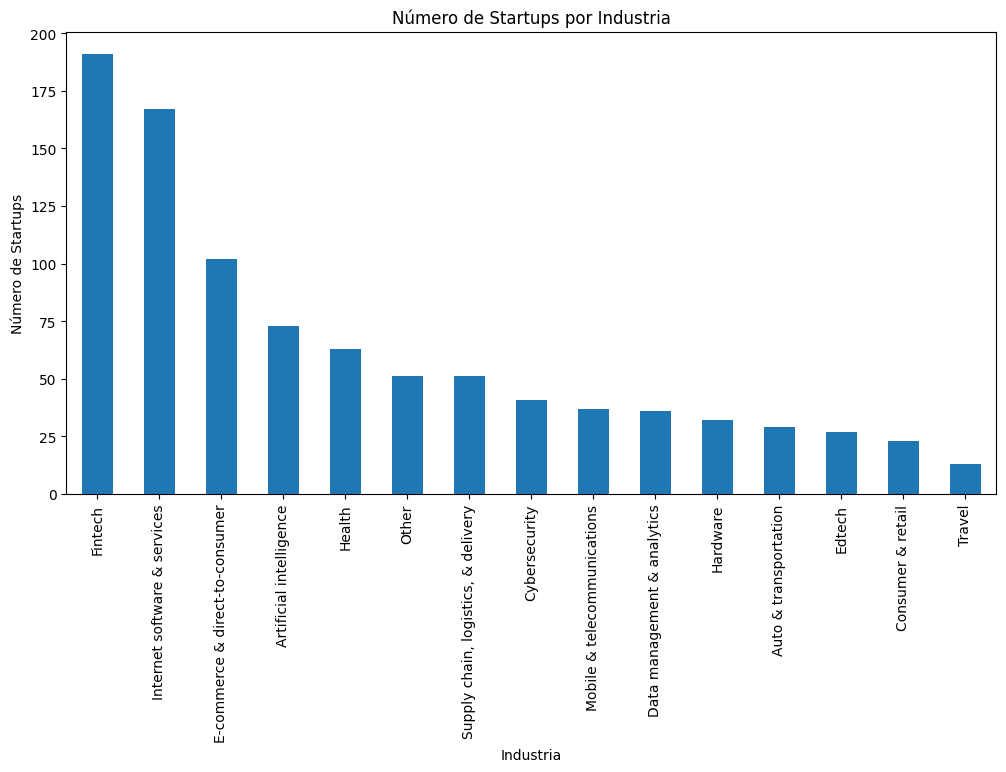

In [22]:
import matplotlib.pyplot as plt

startups_por_industria.plot(kind='bar', figsize=(12, 6))
plt.title('Número de Startups por Industria')
plt.xlabel('Industria')
plt.ylabel('Número de Startups')
plt.show()


<Axes: >

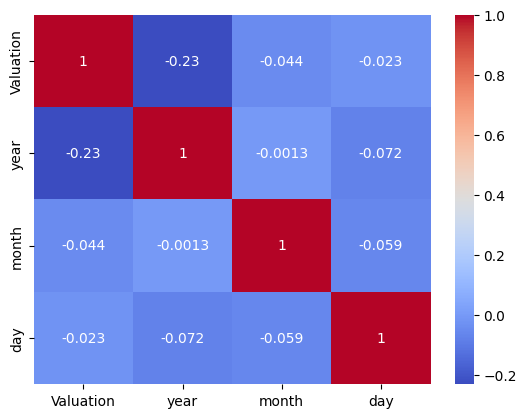

In [23]:
unicornios_numericos = unicornios.select_dtypes(include=['float64', 'int64'])

correlation = unicornios_numericos.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')



In [24]:
unicornios.columns

Index(['Valuation', 'Country', 'City', 'Industry', 'Investors', 'year',
       'month', 'day'],
      dtype='object')

<Axes: xlabel='year'>

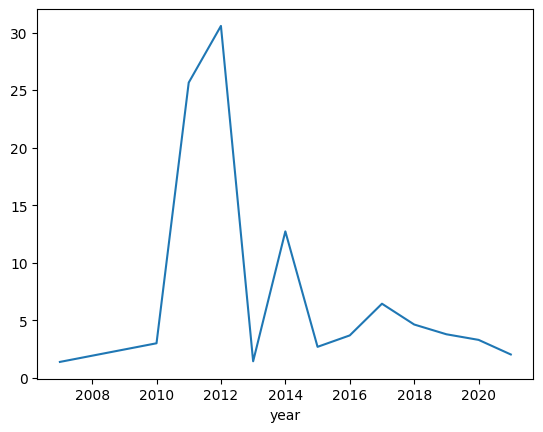

In [25]:
unicornios.groupby('year')['Valuation'].mean().plot(kind='line')


<Axes: xlabel='Country'>

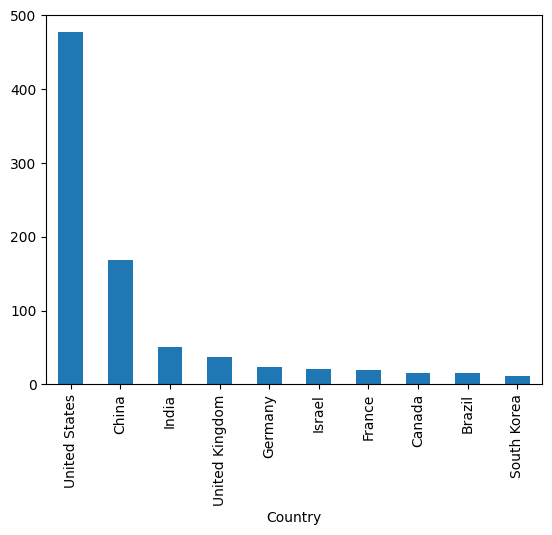

In [26]:
unicornios['Country'].value_counts().head(10).plot(kind='bar')


<Axes: xlabel='Country'>

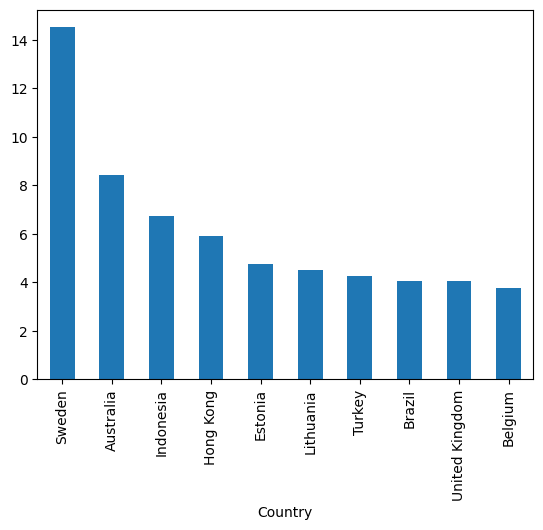

In [27]:
top_countries = unicornios.groupby('Country')['Valuation'].mean().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar')


<Axes: xlabel='Industry'>

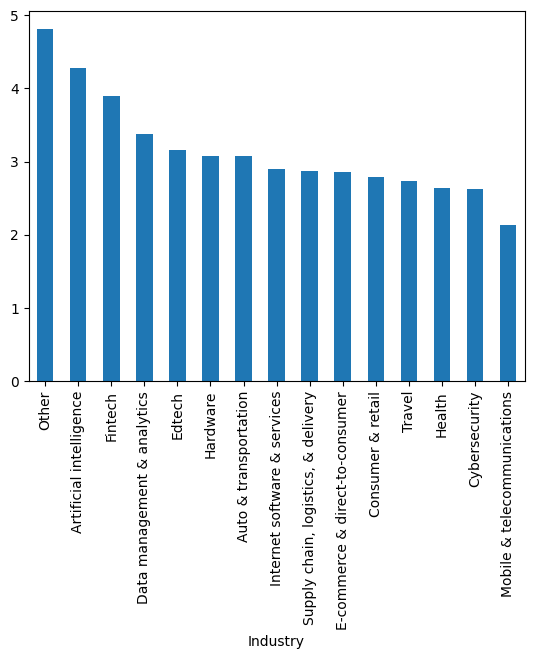

In [28]:
unicornios.groupby('Industry')['Valuation'].mean().sort_values(ascending=False).plot(kind='bar')


# Feature Engineering

In [29]:
investors_unicos = unicornios['Investors'].unique()
print(investors_unicos)


["0      Sequoia Capital China, SIG Asia Investments, S...\n1      Founders Fund, Draper Fisher Jurvetson, Rothen...\n2            Khosla Ventures, LowercaseCapital, capitalG\n3      Institutional Venture Partners, Sequoia Capita...\n4      Sequoia Capital China, Blackbird Ventures, Mat...\n5      Khosla Ventures, Kleiner Perkins Caufield & By...\n6      Andreessen Horowitz, New Enterprise Associates...\n7             index Ventures, DST Global, Ribbit Capital\n8      Sequoia Capital, Redpoint e.ventures, Kaszek V...\n9                  Tencent Holdings, KKR, Smash Ventures\n10      Forerunner Ventures, Crosslink Capital, Homebrew\n11                Sequoia Capital, Thoma Bravo, Softbank\n12     Tencent Holdings, Lightspeed India Partners, S...\n13                        GGV Capital, ZhenFund, Tencent\n14     Hillhouse Capital Management, Boyu Capital, Se...\n15     SoftBank Group, Andreessen Horowitz, Temasek H...\n16          Tencent Holdings, Warbug Pincus, IDG Capital\n17          

In [30]:
todos_inversores = []

for investors in unicornios['Investors']:
    lista_inversores = investors.split(',')
    todos_inversores.extend(lista_inversores)

inversores_unicos = list(set(todos_inversores))
print(inversores_unicos)


['', ' T. Rowe Price', ' Georgian ...\n877        Greylock Partners', ' Shenzhen ...\n477    Centurium Capital', ' RRE Ventures', ' Andreessen Horowitz\n407        Gauss Ventures', ' T...\n655     Venrock', ' China Internet Invest...\n644    Russia-China Investment Fund', ' 8VC\n785          JOY Capital', ' Prosus Ventures', ' Accel\n268    Tiger Global Management', ' F-Prime Capital\n500     Deciens Capital', ' CreditEa...\n228                                 CPP Investment Board\n229      General Catalyst', ' Warbug Pincus', ' ES Ventures', ' Crowdcube\n599    Tencent Holdings', ' Thirty Five Ventures', ' Genesis Partners', ' Emergence...\n471    BEENEXT', ' ION Crossover Partners\n523            Chiratae Ventures', ' CR Capital Mgmt', ' Delta Capital', ' Andreessen Horowitz', ' Sands Capital', ' DS...\n844    Version One Ventures', ' Maniv Mobility\n680    GGV Capital', ' Goldman Sachs\n606    CreditEase Fintech Investment Fund', ' Coinbase Ventures\n218    Shunwei Capital Partners'

In [31]:
print(unicornios['Investors'].head())


0    0      Sequoia Capital China, SIG Asia Investm...
1    0      Sequoia Capital China, SIG Asia Investm...
2    0      Sequoia Capital China, SIG Asia Investm...
3    0      Sequoia Capital China, SIG Asia Investm...
4    0      Sequoia Capital China, SIG Asia Investm...
Name: Investors, dtype: object


In [32]:
unicornios['num_investors'] = unicornios['Investors'].apply(lambda x: len(x.split(',')))
print(unicornios.head())


   Valuation        Country           City                      Industry   
0      140.0          China        Beijing       Artificial intelligence  \
1      100.3  United States      Hawthorne                         Other   
2       95.0  United States  San Francisco                       Fintech   
3       45.6         Sweden      Stockholm                       Fintech   
4       40.0      Australia    Surry Hills  Internet software & services   

                                           Investors  year  month  day   
0  0      Sequoia Capital China, SIG Asia Investm...  2017      7    4  \
1  0      Sequoia Capital China, SIG Asia Investm...  2012      1   12   
2  0      Sequoia Capital China, SIG Asia Investm...  2014     23    1   
3  0      Sequoia Capital China, SIG Asia Investm...  2011     12   12   
4  0      Sequoia Capital China, SIG Asia Investm...  2018      8    1   

   num_investors  
0           1598  
1           1598  
2           1598  
3           1598  
4  

In [33]:
unicornios['valuation_category'] = pd.qcut(unicornios['Valuation'], q=4, labels=['Baja valoración', 'Valoración media-baja', 'Valoración media-alta', 'Alta valoración'])


In [34]:
unicornios.isnull().sum()


Valuation             0
Country               0
City                  0
Industry              0
Investors             0
year                  0
month                 0
day                   0
num_investors         0
valuation_category    0
dtype: int64

In [35]:
unicornios = pd.get_dummies(unicornios, columns=['Country', 'City', 'Industry']) 


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
unicornios['num_investors'] = scaler.fit_transform(unicornios[['num_investors']])



In [37]:
print(unicornios.columns)


Index(['Valuation', 'Investors', 'year', 'month', 'day', 'num_investors',
       'valuation_category', 'Country_Argentina', 'Country_Australia',
       'Country_Austria',
       ...
       'Industry_E-commerce & direct-to-consumer', 'Industry_Edtech',
       'Industry_Fintech', 'Industry_Hardware', 'Industry_Health',
       'Industry_Internet software & services',
       'Industry_Mobile & telecommunications', 'Industry_Other',
       'Industry_Supply chain, logistics, & delivery', 'Industry_Travel'],
      dtype='object', length=308)


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from math import sqrt


industries = [col for col in unicornios.columns if col.startswith('industry_')]


countries = [col for col in unicornios.columns if col.startswith('Country_')]


features = ['year', 'num_investors'] + industries + countries

X = unicornios[features]  
y = unicornios['Valuation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de modelos para probar
modelos = [
    ("Linear Regression", LinearRegression()),
    ("Polynomial Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("KNN", KNeighborsRegressor(n_neighbors=5)),
    ("Support Vector Machine", SVR(kernel='linear')),
    ("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42))
]

for name, model in modelos:
    if name == "Polynomial Regression":
        poly = PolynomialFeatures(degree=2)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Modelo: {name}")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")
    print("\n")


Modelo: Linear Regression
MSE: 4.4544404223441284e+23
MAE: 126815038051.67445
RMSE: 667415943946.811
R2 Score: -8.79587840940635e+21


Modelo: Polynomial Regression
MSE: 2.0857720778139748e+23
MAE: 85447873388.59406
RMSE: 456702537524.58777
R2 Score: -4.1186312637967583e+21


Modelo: Decision Tree
MSE: 63.43849418668394
MAE: 2.4265590224582367
RMSE: 7.964828572334997
R2 Score: -0.252676494544426


Modelo: KNN
MSE: 49.26716970212767
MAE: 2.19536170212766
RMSE: 7.0190576078365154
R2 Score: 0.02715494385834427


Modelo: Support Vector Machine
MSE: 51.3435035646871
MAE: 1.8862184620043592
RMSE: 7.165438127894699
R2 Score: -0.013844998807394315


Modelo: Random Forest
MSE: 57.55897333650516
MAE: 2.406635474237986
RMSE: 7.586763034160561
R2 Score: -0.13657762330500112




Cross validation

Pipeline

In [45]:
from sklearn.pipeline import Pipeline


modelos = [
    ("Linear Regression", LinearRegression()),
    ("Polynomial Regression", Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression())])),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("KNN", KNeighborsRegressor(n_neighbors=5)),
    ("Support Vector Machine", SVR(kernel='linear')),
    ("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42))
]

for name, model in modelos:
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)

    print(f"Modelo: {name}")
    print(f"Scores: {rmse_scores}")
    print(f"Media: {rmse_scores.mean()}")
    print(f"Desviación estándar: {rmse_scores.std()}")
    print("\n")


Modelo: Linear Regression
Scores: [2.60052478e+11 4.77843934e+12 5.57849450e+12 1.12275450e+12
 3.20841248e+12]
Media: 2989630659083.0254
Desviación estándar: 2043807309832.6501


Modelo: Polynomial Regression
Scores: [3.86181216e+10 5.00479684e+11 1.18648701e+10 6.74845252e+10
 2.94969429e+11]
Media: 182683326109.7047
Desviación estándar: 188046369781.21484


Modelo: Decision Tree
Scores: [16.97701793  6.26574535  2.6529623   4.93230185  2.74731503]
Media: 6.715068491205267
Desviación estándar: 5.309077672645589


Modelo: KNN
Scores: [16.60717896 10.56864423 10.90384973 12.82810323  8.54091036]
Media: 11.889737304021441
Desviación estándar: 2.7227445534259997


Modelo: Support Vector Machine
Scores: [17.09742378  1.3250217   0.71509823  1.52916639  1.09003372]
Media: 4.351348765194581
Desviación estándar: 6.37878187184103


Modelo: Random Forest
Scores: [16.98520596  5.3816621   2.93663013  4.54806252  2.42294137]
Media: 6.454900417568327
Desviación estándar: 5.372338888925264




Ajuste de hiperparámetros

In [46]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

best_rf = grid_search.best_estimator_


{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}


In [47]:
best_rf = RandomForestRegressor(n_estimators=50, max_depth=20, min_samples_split=5, min_samples_leaf=4, random_state=42)

best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Modelo: Mejor Random Forest")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")
print("\n")


Modelo: Mejor Random Forest
MSE: 49.58516339550736
MAE: 2.2414410451393647
RMSE: 7.041673337744897
R2 Score: 0.02087574019474725




In [56]:
from joblib import dump

dump(best_rf, 'new_model.joblib') 



['new_model.joblib']